# Project: Investigation of movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project movie data set was chosen. First of all, data cleaning steps will be performed. Later on, data will be explored. Researches will focus on comparison of a particular movie genres, 75th percentile of revenues, frequency of one variable, correlation of two variables.


In [1]:
# Packages import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from prettytable import PrettyTable

<a id='wrangling'></a>
## Data Wrangling

### General Properties
In this part data set will be loaded and general information about data set is going to be gathered. Due to performance issues it is a good idea to limit data only to information needed for analysis.

In [2]:
# Load a dataset
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# Print out 3 rows to be familiar with the chosen dataset
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
# Create new dataset based on which investigation will be performed. Eliminate columns excluded from the analysis.
new_df = df.filter(['id', 'popularity', 'budget', 'revenue', 'original_title', 'genres', 'vote_count',
                    'vote_average', 'release_year'])

# Print out 5 rows 
new_df.head(5)

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.3,2015


In [5]:
# View dimensions of the investigated dataset
new_df.shape

(10866, 9)

In [6]:
# Inspect datatypes
new_df.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
genres             object
vote_count          int64
vote_average      float64
release_year        int64
dtype: object

In [7]:
# This returns useful descriptive statistics for each column of data
new_df.describe()

,id,popularity,budget,revenue,vote_count,vote_average,release_year
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,217.389748,5.974922,2001.322658
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,575.619058,0.935142,12.812941
min,5.000000,0.000065,0.000000e+00,0.000000e+00,10.000000,1.500000,1960.000000
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,17.000000,5.400000,1995.000000
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,38.000000,6.000000,2006.000000
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,145.750000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,9767.000000,9.200000,2015.000000


### Data Cleaning
Performing the following cleaning steps:
- removing duplicates, 
- dealing with missing values. 

In [8]:
# Inspect data types and look for instances of missing values
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 764.1+ KB


In [9]:
# View missing value count
sum(new_df.isnull().values.ravel())

23

In [10]:
# Drop rows with any null values in dataset
new_df = new_df.dropna()

In [11]:
# Verify missing value count
new_df.isnull().sum().any()

False

In [12]:
# Check for duplicates in the data
sum(new_df.duplicated())

1

In [13]:
# Drop duplicates in dataset 
new_df = new_df.drop_duplicates()

In [14]:
# Confirm correction by rechecking for duplicates in the data
sum(new_df.duplicated())

0

In [15]:
# Save the final file
new_df.to_csv('tmdb-movies_final.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Research 1: Revenue comparison per year for horrors, thrillers and dramas
In this section function was implemented to extract movie genres and group them by year. Then, genres will be compared based on visualization.

In [16]:
# Print out genres
new_df['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [17]:
# Create function to extract required data
def genres_revenue(df, genre):
    filtered_df = df.loc[df['genres'].str.contains(genre, na=False)]
    return filtered_df.groupby(filtered_df['release_year'])['revenue'].sum()

# Creating data frames for chosen movie types
horror_df = genres_revenue(new_df, 'Horror')
thriller_df = genres_revenue(new_df, 'Thriller')
drama_df = genres_revenue(new_df, 'Drama')

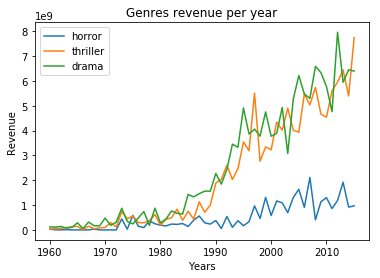

In [18]:
# Create visualization
plt.title('Genres revenue per year')
horror_ax = horror_df.plot(label='horror')
thriller_ax = thriller_df.plot(label='thriller')
drama_ax = drama_df.plot(label='drama')
plt.xlabel('Years')
plt.ylabel('Revenue')
plt.legend()

In [19]:
# Sum revenue of horror
sum_horror = horror_df.sum()

In [20]:
# Sum revenue of thriller
sum_thriller = thriller_df.sum()

In [21]:
# Sum revenue of drama
sum_drama = drama_df.sum()

In [22]:
# Displaying sum revenues
table = PrettyTable(['Genres', 'Sum'])
table.add_row(['Horror', sum_horror])
table.add_row(['Thriller', sum_thriller])
table.add_row(['Drama', sum_drama])
print(table)

+----------+--------------+
|  Genres  |     Sum      |
+----------+--------------+
|  Horror  | 27538937718  |
| Thriller | 121304509800 |
|  Drama   | 139145537255 |
+----------+--------------+


### Research observation 1:
In the 60's, 70's revenue of all analyzed movies was approximately on the same level. From the 80's an upward trend was observed - thrillers and dramas generated much more revenue than horrors. In the 90's revenue of horrors only once (in 1999) was more than 1 billion dollars.Iin the 90'stThrillers reached the peak in 1997 - over 5.5 billion dollars. In the 90's drama revenue reached the maximum revenue in 1995 - nearly 5 billion dollars. In period 2010-2015 max revenues of genres were the following for each category:
- drama - 6.4 billion dollars in 2014,
- thriller - 7.7 billion dollars in 2015,
- horror - 1.9 billion dollars in 2013.


In the analyzed period the biggest total revenue had drama genre - 139.1 billion dollars. In the second place are thriller movies which earned 121.3 billion dollars. Horrors put the third place with 27,5 billion dollars.

### Research 2: 75th percentile of revenues
In this part of project 75th percentile of revenues will be found.

In [23]:
# Found 75th percentile of revenues
def p_revenue(df, genre):
    p_df = df.loc[df['genres'].str.contains(genre, na=False)]
    return np.percentile(p_df['revenue'], 75)

horror_p = p_revenue(new_df, 'Horror')
thriller_p = p_revenue(new_df, 'Thriller')
drama_p = p_revenue(new_df, 'Drama')

In [24]:
t = PrettyTable(['Genre', '75th percentile'])
t.add_row(['Horror', horror_p])
t.add_row(['Thriller', thriller_p])
t.add_row(['Drama', drama_p])
print(t)

+----------+-----------------+
|  Genre   | 75th percentile |
+----------+-----------------+
|  Horror  |    5765562.0    |
| Thriller |    32515119.5   |
|  Drama   |    21000000.0   |
+----------+-----------------+


### Research observation 2:
75th percentile of revenue are the following for analysed genres in descending order:
- thriller - 32 515 119.5,
- drama - 21 000 000,
- horror - 5 765 562.

### Research 3: What is a frequency of average votes?
In this section a frequency of average votes is going to be analyzed.

Text(0.5,0,'Average vote')

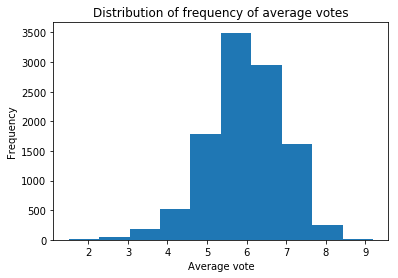

In [25]:
# Display distribution of frequency of average votes
plt.title('Distribution of frequency of average votes')
df['vote_average'].plot(kind='hist')
plt.xlabel('Average vote')

In [26]:
# Count mean
df['vote_average'].mean()

5.9749217743419845

### Research observation 3:
The most common average vote is between 5.5-6.0 with the frequency of 3500. A histogram is left skewed. Mean of average votes is 5.97.

### Research 4: What is a correlation between two variables?
Here correlation between average votes and budget will be explored.

Text(0.5,1,'Correration between average votes and budget')

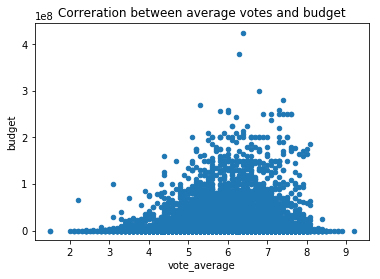

In [27]:
# Plot relationship between average votes and budget
df.plot(x='vote_average', y='budget', kind='scatter')
plt.title('Correration between average votes and budget')

### Research observation 4:
It looks that there is no apparent relationship between the two analysed variables.

<a id='conclusions'></a>
## Conclusions

Due to performance issues I created new dataset with only those columns which were crucial for my analysis. The biggest limitation I faced while doing this project was 'genres' column which contains multiple values separated by pipe (|). I dealt with it using functions to check specific movie genres. 
What is more, there were 23 out of 10866 missing values in 'genres' column. Since number of missing values was not so big in comparison to number of rows in the whole dataset, I decided to drop the missing rows. In two of my researches I focused on movie genres so I wanted to avoid having missing values in my dataset. Additionally, one duplicated row was found and dropped.

In research #1 and #2 of this project the following movie genres were discovered - thrillers, dramas and horrors. Thanks to those reserches we found out that movie genre has impact on revenue in a given period. Drama movies had the highest sum of revenue. 

The biggest total revenue had drama genre - 139.1 billion dollars. Thrillers out the second place - 121.3 billion dollars and horrors the third place - 27,5 billion dollars.

Thrillers had the highest value of 75th percentile of revenues in a given period.

In the last two researches frequency of average vote and correlation between two variables were explored.


The most common average vote is between 5.5-6.0 with the frequency of 3500.


It may be suprising that there is no apparent correlation between average votes and budget.

In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigation_Of_Movie_Dataset.ipynb'])

0